In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud as wc

In [2]:
path = os.path.join(os.getcwd(), "cpp", "param", "ap")
alpha_path = os.path.join(path, "alpha.dat")
beta_path = os.path.join(path, "beta.dat")

alpha = pd.read_table(alpha_path, sep=" ", header = None)
beta = pd.read_table(beta_path, sep=" ", header = None)

vocab_path = os.path.join(os.getcwd(), "cpp", "datasets", "ap", "vocab.txt" )
vocab = pd.read_table(vocab_path, header=None)

In [3]:
alpha

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.003068,0.003068,0.003068,0.003068,0.003068,0.003068,0.003068,0.003068,0.003068,0.003068,...,0.003068,0.003068,0.003068,0.003068,0.003068,0.003068,0.003068,0.003068,0.003068,0.003068


In [4]:
sorted_topics = alpha.transpose().sort_values(0, ascending=False).index
for topic in sorted_topics:
    top_words = beta.loc[topic].sort_values(ascending=False).index
    
    if topic < 10:
        print topic, " :" ,
    else:
        print topic , ":" , 
        
    for i in xrange(30):
        print vocab[0].loc[top_words[i]], 
    print
    print

0  : percent ibm art sothebys officials computer joan school chips company ms new today reported american offered birth technology say disagreed york times three thompson industry gallery district business undecided gave

94 : eastern abortion air airlines pilots airline faa court service federal new two i orion souter union american judge decision abortions bush continental senate easterns committee president uta training year state

96 : de i mandela klerk anc black people government question south avril mr president natal african leader situation political aristide violence state two country haiti leaders buthelezi africa stability talks emergency

97 : i people think soviet dont going grigoryants two time go like gorbachev get american president police last got see first hes q im program glasnost officials news years thats bishop

98 : rios montt lindsey court military president gen people two power assembly coup war attack death national government died medal supreme congress army

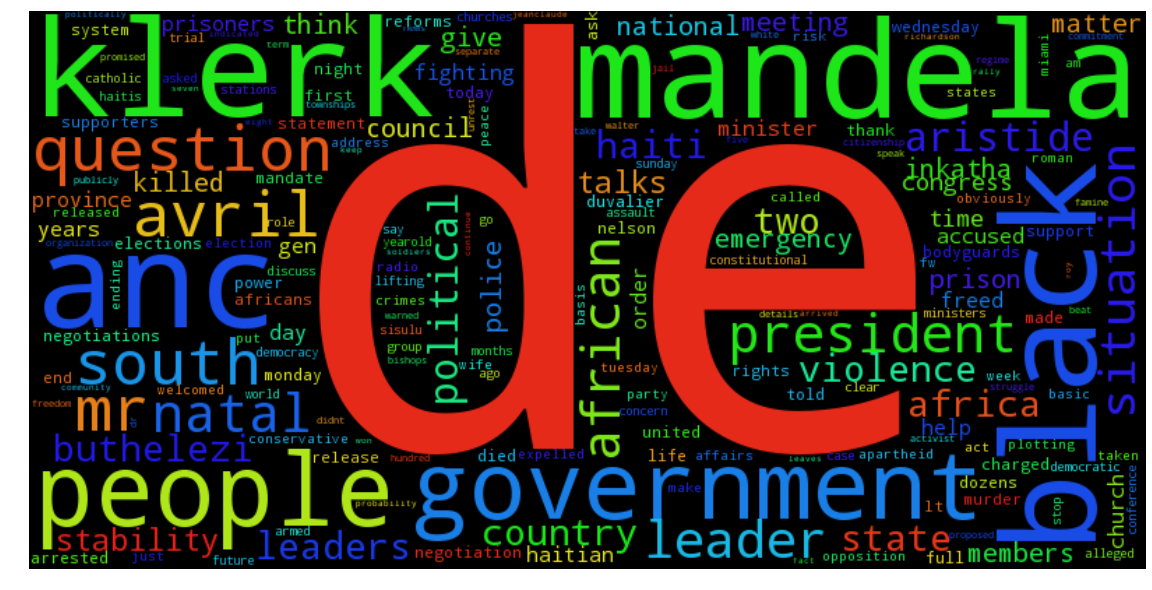

In [66]:
topic = 96
top_words = beta.loc[topic].sort_values(ascending=False).index[0:400]
word_list = []
for word_index in top_words:
    if word_index != 0:
        word_freq = (vocab[0].loc[word_index], beta.loc[topic][word_index].round(5))
        word_list.append(word_freq)
        
plt.figure(figsize=(20,10))
wordcloud = wc.WordCloud(width=800, height=400).generate_from_frequencies(word_list)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()